In [1]:
import os; os.chdir('../')
import sys; sys.path.append('.')

In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [3]:
import json
from datetime import datetime, timezone

In [4]:
from mongoengine.connection import disconnect
from importlib import reload
import py.classes as classes;reload(classes)
import py.mongo as mongo;reload(mongo)
disconnect()
db = mongo.connect_to_mongo(db_name='evo')

import logging
l = logging.getLogger("my_logger")
logging.basicConfig(level=logging.DEBUG)

<module 'py.classes' from '/Users/userid/git/evotrade/py/classes.py'>

<module 'py.mongo' from '/Users/userid/git/evotrade/py/mongo.py'>

In [5]:
columns = ['id', 'name', 'status', 'description', 'created_at', 'updated_at', 'config_name', 'points']
data = [(t.id, t.name, t.status, t.description, t.created_at, t.updated_at, t.configuration.name if t.configuration else None, len(t.points)) 
            for t in mongo.Experiment.objects]
pd.DataFrame(data, columns = columns).set_index('name')

,id,status,description,created_at,updated_at,config_name,points
name,,,,,,,
debug_task,5cd9e49cd71f102be1f5d3c2,DONE,this is a test task,2019-05-13 21:41:48.787,2019-05-13 21:42:02.895,simple test config,2
"RI initial, buy, local",5cdc8f34d71f102dbd7b03c7,DONE,"The first try to work on RI, buy",2019-05-15 22:14:12.866,2019-05-16 21:43:54.411,RI buy,400
"GD [stopped] initial, buy, local",5cddd236d71f100c646bde56,STOPPED,"The first try to work on GD, buy",2019-05-16 21:12:21.978,2019-05-17 14:39:25.313,GD buy old,234
"RI initial, sell, local",5cdde421d71f100c646bde57,DONE,"The first try to work on RI, sell",2019-05-16 22:28:49.684,2019-05-21 08:58:23.945,GD buy new,400
"GD initial, buy, local",5ce07bcfd71f1037c0e267c3,DONE,"The first try to work on GD, buy",2019-05-18 21:40:30.902,2019-05-19 08:47:27.145,GD buy new,400
"GD [STOPPED] initial, sell",5ce07be5d71f1037c0e267c4,STOPPED,"The first try to work on GD, sell",2019-05-18 21:40:53.616,2019-05-20 07:43:48.082,GD sell new,145
"SR initial, sell, local",5ce1cae9d71f1037c0e267c5,DONE,"The first try to work on SR, sell",2019-05-19 21:30:16.413,2019-05-20 04:19:15.613,SR sell,400
"SR initial, buy, local",5ce1cafed71f1037c0e267c6,DONE,"The first try to work on SR, buy",2019-05-19 21:30:38.118,2019-05-20 09:12:17.767,SR buy,400
"GZ initial, buy, local",5ce1cbfbd71f1037c0e267c7,DONE,"The first try to work on GZ, buy",2019-05-19 21:34:51.168,2019-05-20 12:54:57.773,GZ buy,400


In [6]:
def experiment_to_df(obj_id, commision_adjustment=0):
    ex = mongo.Experiment.objects(pk=obj_id).first()

    # reading results
    i = 0
    data = []
    for p in ex.points:
        full_point = p.fetch()
        data.append(dict(
            step=full_point.step,
            test_deals = full_point.evaluation_on_test.deals_count,
            test_mean = full_point.evaluation_on_test.mean+commision_adjustment,
            test_std = full_point.evaluation_on_test.std,
            test_worst_deal = full_point.evaluation_on_test.worst_deal,
            test_best_deal = full_point.evaluation_on_test.best_deal,
            test_days = full_point.evaluation_on_test.days,
            test_deals_p_day = full_point.evaluation_on_test.deals_per_day,
            val_deals = full_point.evaluation_on_val.deals_count,
            val_mean = full_point.evaluation_on_val.mean+commision_adjustment,
            val_std = full_point.evaluation_on_val.std,
            val_worst_deal = full_point.evaluation_on_val.worst_deal,
            val_best_deal = full_point.evaluation_on_val.best_deal
        ))
        i += 1
    #     if i==10: break

    df = pd.DataFrame(data)

    df = df[df.test_deals>0]
    df['test_profit'] = df.test_mean*df.test_deals
    df['val_profit'] = df.val_mean*df.val_deals
    df.sort_values('val_profit', ascending=False, inplace=True)
    df['diff'] = df.val_mean - df.val_std
    return df

## Look at RI

## buy

In [166]:
df_RI = experiment_to_df('5cdc8f34d71f102dbd7b03c7')

FieldDoesNotExist: The fields "{'test_mean', 'val_mean', 'val_std', 'test_std'}" do not exist on the document "Point"

In [ ]:
df_RI[:10]

## sell

In [12]:
ex = mongo.Experiment.objects(pk='5ce3f073d71f1037c0e267ca').first()

In [19]:
p  = mongo.Point.objects(experiment=ex).first()

In [9]:
df_RIs = experiment_to_df('5ce3f073d71f1037c0e267ca')

In [11]:
df_RIs[:20].sort_values('diff', ascending=False)

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
134,135,920.0,225,1422,6.320000,103.382560,172.699374,-460.0,1920.0,9223,108.100401,215.844993,-650.0,147010.0,997010.0,-107.744591
86,87,980.0,225,1886,8.382222,70.774125,173.172412,-410.0,1920.0,12241,71.083245,210.831693,-750.0,133480.0,870130.0,-139.748449
91,92,920.0,225,980,4.355556,89.989796,190.702963,-280.0,1920.0,6376,88.309285,236.269761,-1090.0,88190.0,563060.0,-147.960476
181,182,920.0,225,1892,8.408889,53.525370,177.514102,-620.0,1910.0,12006,56.258537,205.138515,-2330.0,101270.0,675440.0,-148.879978
198,199,920.0,225,1736,7.715556,66.434332,167.198356,-410.0,1920.0,11316,58.257335,212.588498,-1090.0,115330.0,659240.0,-154.331164
112,113,800.0,225,1501,6.671111,69.853431,192.435215,-620.0,2400.0,9455,73.625595,236.403334,-750.0,104850.0,696130.0,-162.777739
175,176,860.0,225,1507,6.697778,57.717319,194.044031,-620.0,2400.0,9034,61.466681,243.396632,-2330.0,86980.0,555290.0,-181.929950
305,306,860.0,225,1818,8.080000,44.317932,183.964182,-620.0,1880.0,10297,45.122851,229.282492,-1090.0,80570.0,464630.0,-184.159641
28,29,800.0,225,1914,8.506667,50.235110,176.338425,-570.0,2400.0,11810,48.202371,233.793767,-2330.0,96150.0,569270.0,-185.591396
4,5,690.0,225,1647,7.320000,65.094111,188.160437,-530.0,2400.0,10508,60.795584,246.600403,-2330.0,107210.0,638840.0,-185.804819


## Look at GD

### buy

In [119]:
df_GDb = experiment_to_df('5ce07bcfd71f1037c0e267c3')

In [164]:
df_GDb.shape

(399, 16)

In [165]:
df_GDb[:20].step.to_list()

[102,
 87,
 89,
 66,
 30,
 9,
 48,
 12,
 7,
 238,
 6,
 253,
 255,
 318,
 368,
 366,
 352,
 320,
 271,
 280]

### sell new2

In [156]:
df_GDs = experiment_to_df('5ce25c0cd71f1037c0e267c9')

In [157]:
df_GDs[:10]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
47,48,11.7,345,84,0.243478,3.023810,3.180347,-3.6,11.0,169,1.673373,2.790961,-5.7,254.0,282.8,-1.117589
64,65,9.0,345,90,0.260870,1.194444,3.061518,-2.8,7.3,131,1.173282,2.569850,-4.1,107.5,153.7,-1.396567
4,5,9.2,345,89,0.257971,1.233708,3.052158,-3.2,10.8,215,0.561395,2.548510,-3.1,109.8,120.7,-1.987115
12,13,9.8,345,12,0.034783,6.116667,3.177716,0.0,12.9,35,3.222857,2.765128,-0.6,73.4,112.8,0.457729
29,30,10.5,345,55,0.159420,2.336364,2.795457,-3.3,6.3,89,1.249438,2.285882,-4.2,128.5,111.2,-1.036444
48,49,9.6,345,12,0.034783,7.816667,2.090599,2.8,4.2,9,2.733333,1.508310,0.8,93.8,24.6,1.225023
20,21,2.3,345,42,0.121739,-0.583333,1.199576,-2.5,4.9,15,1.120000,2.551246,-4.1,-24.5,16.8,-1.431246
44,45,11.3,345,9,0.026087,8.766667,1.781151,4.8,2.8,2,1.350000,2.050610,-0.1,78.9,2.7,-0.700610
7,8,8.7,345,9,0.026087,4.855556,3.711843,-1.6,4.1,14,0.135714,2.214848,-2.1,43.7,1.9,-2.079133
0,1,8.5,345,3,0.008696,8.333333,0.152753,8.2,0.0,0,0.000000,0.000000,0.0,25.0,0.0,0.000000


## sell new

In [128]:
df_GDsn = experiment_to_df('5ce07be5d71f1037c0e267c4')
df_GDsn[:10]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
0,1,9.6,345,17,0.049275,6.194118,2.461318,0.7,7.3,33,2.603030,2.022759,-2.3,105.3,85.9,0.580272
7,8,11.5,345,68,0.197101,0.392647,3.983036,-4.9,7.2,32,0.831250,2.685497,-2.7,26.7,26.6,-1.854247
1,2,10.6,345,6,0.017391,8.516667,2.074046,4.5,10.6,2,5.550000,7.141778,0.5,51.1,11.1,-1.591778
12,13,2.3,345,7,0.020290,0.200000,1.876166,-1.5,0.1,3,-0.500000,0.655744,-1.2,1.4,-1.5,-1.155744
6,7,9.1,345,5,0.014493,0.880000,4.598043,-1.3,2.9,11,-1.200000,1.419859,-2.4,4.4,-13.2,-2.619859
4,5,11.1,345,526,1.524638,-0.122053,2.617714,-6.5,10.1,706,-0.284844,2.309317,-7.5,-64.2,-201.1,-2.594162
10,11,9.8,345,617,1.788406,-0.807618,2.474905,-10.2,9.0,625,-0.858560,2.330586,-9.9,-498.3,-536.6,-3.189146
11,12,7.5,345,1095,3.173913,-0.520731,1.479945,-4.9,8.7,2210,-0.485792,1.507563,-3.7,-570.2,-1073.6,-1.993354
3,4,11.3,345,1645,4.768116,-0.541094,2.148442,-5.5,11.2,3150,-0.686286,2.030927,-6.3,-890.1,-2161.8,-2.717213
9,10,11.7,345,2109,6.113043,-0.690754,1.701335,-6.2,10.1,3954,-0.699368,1.698315,-7.5,-1456.8,-2765.3,-2.397682


## Look at SR

### sell

In [148]:
df_SRs = experiment_to_df('5ce1cae9d71f1037c0e267c5')

In [149]:
df_SRs[:20]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
382,383,249.0,380,425,1.118421,32.665882,61.872673,-205.0,534.0,1519,50.801843,89.257991,-288.0,13883.0,77168.0,-38.456148
330,331,249.0,380,338,0.889474,25.500000,70.467799,-205.0,534.0,1350,54.199259,92.219657,-296.0,8619.0,73169.0,-38.020397
359,360,249.0,380,438,1.152632,30.981735,60.674203,-208.0,534.0,1552,45.307990,87.536684,-296.0,13570.0,70318.0,-42.228694
368,369,249.0,380,377,0.992105,26.519894,65.257675,-208.0,534.0,1369,48.473338,92.323656,-296.0,9998.0,66360.0,-43.850317
351,352,249.0,380,463,1.218421,31.021598,62.443945,-205.0,476.0,1531,42.932724,88.747067,-298.0,14363.0,65730.0,-45.814343
74,75,249.0,380,915,2.407895,22.771585,49.832951,-217.0,476.0,1880,34.360106,80.523286,-248.0,20836.0,64597.0,-46.163180
353,354,249.0,380,364,0.957895,24.711538,68.376383,-208.0,534.0,1158,55.550950,97.309131,-296.0,8995.0,64328.0,-41.758181
370,371,249.0,380,339,0.892105,26.702065,70.522666,-208.0,534.0,1084,58.568266,102.077189,-296.0,9052.0,63488.0,-43.508923
395,396,229.0,380,415,1.092105,25.640964,62.342081,-205.0,534.0,1440,43.753472,94.315601,-296.0,10641.0,63005.0,-50.562129
375,376,249.0,380,393,1.034211,19.694656,69.634457,-208.0,534.0,1281,48.794692,95.596413,-296.0,7740.0,62506.0,-46.801722


In [150]:
df_SRs.sort_values('diff', ascending=False)[:10]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
230,231,287.0,380,205,0.539474,4.912195,106.325721,-308.0,172.0,9,95.000000,67.308989,-35.0,1007.0,855.0,27.691011
219,220,249.0,380,69,0.181579,54.666667,75.987744,-55.0,534.0,169,151.455621,136.260647,-55.0,3772.0,25596.0,15.194975
91,92,249.0,380,71,0.186842,33.070423,60.858460,-52.0,475.0,56,139.892857,135.940853,-101.0,2348.0,7834.0,3.952004
103,104,260.0,380,202,0.531579,-12.039604,106.994436,-398.0,201.0,16,97.812500,96.882209,-149.0,-2432.0,1565.0,0.930291
46,47,229.0,380,189,0.497368,45.465608,66.184101,-158.0,534.0,532,94.821429,101.849729,-164.0,8593.0,50445.0,-7.028300
333,334,249.0,380,384,1.010526,27.710938,68.281114,-208.0,476.0,823,59.606318,89.235128,-296.0,10641.0,49056.0,-29.628810
342,343,249.0,380,268,0.705263,32.444030,74.921286,-208.0,476.0,772,59.528497,89.971882,-191.0,8695.0,45956.0,-30.443384
346,347,249.0,380,288,0.757895,30.791667,68.283981,-205.0,476.0,912,47.936404,78.902782,-202.0,8868.0,43718.0,-30.966379
158,159,311.0,380,222,0.584211,-13.090090,94.419881,-257.0,161.0,20,60.850000,91.931482,-149.0,-2906.0,1217.0,-31.081482
332,333,249.0,380,291,0.765789,34.862543,68.851076,-208.0,534.0,739,66.847091,99.300669,-296.0,10145.0,49400.0,-32.453579


### buy

In [145]:
df_SRb = experiment_to_df('5ce1cafed71f1037c0e267c6')

In [146]:
df_SRb[:20]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
71,72,217.0,380,1001,2.634211,13.374625,60.926009,-228.0,544.0,2089,43.410723,87.968575,-244.0,13388.0,90685.0,-44.557852
70,71,214.0,380,607,1.597368,24.467875,67.967828,-115.0,472.0,1946,42.378212,89.863243,-194.0,14852.0,82468.0,-47.485031
88,89,214.0,380,518,1.363158,23.677606,75.839252,-168.0,472.0,1525,48.606557,94.152226,-175.0,12265.0,74125.0,-45.545669
57,58,214.0,380,717,1.886842,18.856346,71.644746,-160.0,515.0,1848,35.964286,92.728016,-194.0,13520.0,66462.0,-56.763730
90,91,214.0,380,645,1.697368,22.291473,67.859340,-255.0,515.0,1272,49.416667,92.863381,-367.0,14378.0,62858.0,-43.446714
86,87,230.0,380,384,1.010526,34.799479,72.758292,-158.0,504.0,900,62.492222,100.284539,-218.0,13363.0,56243.0,-37.792317
112,113,428.0,380,246,0.647368,40.247967,96.786908,-216.0,688.0,724,74.339779,159.768195,-239.0,9901.0,53822.0,-85.428416
122,123,475.0,380,216,0.568421,43.560185,98.844939,-132.0,716.0,673,77.634473,124.445186,-129.0,9409.0,52248.0,-46.810713
68,69,209.0,380,410,1.078947,26.243902,69.488027,-146.0,524.0,1019,48.960746,97.347152,-269.0,10760.0,49891.0,-48.386406
105,106,483.0,380,208,0.547368,45.254808,99.130946,-146.0,628.0,659,72.996965,136.117708,-152.0,9413.0,48105.0,-63.120743


In [147]:
df_SRb.sort_values('diff', ascending=False)[:10]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
135,136,208.0,380,36,0.094737,19.694444,138.011349,-197.0,392.0,2,369.500000,31.819805,347.0,709.0,739.0,337.680195
79,80,202.0,380,62,0.163158,41.483871,82.741498,-134.0,176.0,2,162.000000,19.798990,148.0,2572.0,324.0,142.201010
100,101,73.0,179,1,0.005587,73.000000,NaN,73.0,336.0,8,201.875000,108.094453,65.0,73.0,1615.0,93.780547
66,67,202.0,380,104,0.273684,18.480769,83.277286,-141.0,300.0,21,147.476190,82.848427,32.0,1922.0,3097.0,64.627763
54,55,202.0,380,148,0.389474,15.810811,81.616688,-120.0,292.0,12,162.416667,114.208309,-39.0,2340.0,1949.0,48.208358
281,282,222.0,380,63,0.165789,66.396825,66.739875,-74.0,250.0,123,94.154472,68.075059,-32.0,4183.0,11581.0,26.079413
55,56,168.0,380,67,0.176316,43.761194,62.423308,-45.0,268.0,116,83.836207,68.450292,-33.0,2932.0,9725.0,15.385915
145,146,212.0,380,106,0.278947,59.650943,102.131758,-134.0,541.0,244,125.385246,113.640538,-133.0,6323.0,30594.0,11.744708
50,51,323.0,380,244,0.642105,29.786885,88.603405,-191.0,413.0,35,139.571429,130.687613,-55.0,7268.0,4885.0,8.883816
92,93,155.0,380,7,0.018421,108.857143,39.142596,62.0,73.0,18,39.166667,31.840134,-15.0,762.0,705.0,7.326533


## Look at GZ

### sell

In [136]:
df_GZs = experiment_to_df('5ce1cc0bd71f1037c0e267c8')

In [138]:
df_GZs[:20]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
4,5,194.0,375,67,0.178667,24.253731,50.962655,-61.0,246.0,218,37.169725,68.540772,-123.0,1625.0,8103.0,-31.371047
8,9,107.0,375,55,0.146667,3.436364,41.677227,-63.0,230.0,162,24.962963,68.957714,-120.0,189.0,4044.0,-43.994751
15,16,121.0,375,393,1.048000,3.198473,36.918986,-153.0,261.0,235,16.953191,79.336201,-207.0,1257.0,3984.0,-62.383010
99,100,110.0,375,257,0.685333,-2.178988,34.766058,-135.0,260.0,354,9.884181,66.447923,-193.0,-560.0,3499.0,-56.563742
114,115,122.0,375,324,0.864000,-6.401235,42.280936,-140.0,260.0,437,4.066362,67.646868,-390.0,-2074.0,1777.0,-63.580507
6,7,176.0,375,375,1.000000,-3.968000,45.974174,-168.0,355.0,381,4.212598,69.318255,-208.0,-1488.0,1605.0,-65.105657
14,15,217.0,375,188,0.501333,-1.659574,70.489511,-196.0,271.0,212,7.386792,91.479682,-198.0,-312.0,1566.0,-84.092889
1,2,64.0,375,13,0.034667,-2.692308,24.136365,-51.0,316.0,7,181.857143,137.077142,-60.0,-35.0,1273.0,44.780001
13,14,39.0,375,9,0.024000,-20.222222,31.661403,-45.0,248.0,9,115.333333,100.637965,7.0,-182.0,1038.0,14.695368
16,17,77.0,375,26,0.069333,22.538462,28.687601,-40.0,288.0,15,62.400000,111.581360,-136.0,586.0,936.0,-49.181360


In [137]:
df_GZs.sort_values('diff', ascending=False)[:10]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
1,2,64.0,375,13,0.034667,-2.692308,24.136365,-51.0,316.0,7,181.857143,137.077142,-60.0,-35.0,1273.0,44.780001
13,14,39.0,375,9,0.024000,-20.222222,31.661403,-45.0,248.0,9,115.333333,100.637965,7.0,-182.0,1038.0,14.695368
31,32,-40.0,326,1,0.003067,-40.000000,NaN,-40.0,0.0,0,0.000000,0.000000,0.0,-40.0,0.0,0.000000
18,19,-3.0,375,3,0.008000,-8.666667,5.131601,-13.0,0.0,0,0.000000,0.000000,0.0,-26.0,0.0,0.000000
85,86,67.0,375,30,0.080000,3.366667,21.312912,-71.0,60.0,27,4.814815,30.386025,-83.0,101.0,130.0,-25.571211
4,5,194.0,375,67,0.178667,24.253731,50.962655,-61.0,246.0,218,37.169725,68.540772,-123.0,1625.0,8103.0,-31.371047
11,12,49.0,375,27,0.072000,-2.962963,27.807693,-39.0,163.0,91,8.857143,45.142877,-91.0,-80.0,806.0,-36.285734
8,9,107.0,375,55,0.146667,3.436364,41.677227,-63.0,230.0,162,24.962963,68.957714,-120.0,189.0,4044.0,-43.994751
12,13,178.0,375,196,0.522667,-4.806122,24.067494,-70.0,205.0,378,2.322751,47.483981,-134.0,-942.0,878.0,-45.161230
16,17,77.0,375,26,0.069333,22.538462,28.687601,-40.0,288.0,15,62.400000,111.581360,-136.0,586.0,936.0,-49.181360


### buy

In [139]:
df_GZb = experiment_to_df('5ce1cbfbd71f1037c0e267c7')

In [140]:
df_GZb[:20]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
6,7,208.0,375,379,1.010667,7.891821,48.660267,-106.0,386.0,984,11.952236,53.259559,-122.0,2991.0,11761.0,-41.307323
2,3,178.0,375,250,0.666667,17.320000,43.730849,-114.0,199.0,522,19.306513,55.283165,-207.0,4330.0,10078.0,-35.976652
5,6,135.0,375,370,0.986667,2.408108,46.344398,-109.0,328.0,907,6.231533,66.687133,-120.0,891.0,5652.0,-60.455600
12,13,171.0,375,189,0.504000,10.534392,55.303852,-67.0,396.0,320,8.571875,85.438650,-106.0,1991.0,2743.0,-76.866775
37,38,109.0,375,223,0.594667,4.587444,29.810667,-46.0,357.0,107,22.196262,56.899023,-41.0,1023.0,2375.0,-34.702762
0,1,154.0,375,42,0.112000,28.071429,44.144106,-66.0,428.0,122,9.540984,118.799028,-218.0,1179.0,1164.0,-109.258044
43,44,164.0,375,117,0.312000,-14.735043,73.171314,-180.0,260.0,5,186.800000,86.860233,44.0,-1724.0,934.0,99.939767
35,36,75.0,375,45,0.120000,-15.155556,46.844984,-121.0,110.0,17,38.117647,56.209299,-112.0,-682.0,648.0,-18.091652
49,50,31.0,375,18,0.048000,-13.277778,22.704769,-42.0,121.0,14,33.214286,38.953974,-36.0,-239.0,465.0,-5.739688
47,48,145.0,375,286,0.762667,-3.975524,54.816787,-105.0,208.0,107,3.971963,68.394866,-99.0,-1137.0,425.0,-64.422903


In [141]:
df_GZb.sort_values('diff', ascending=False)[:10]

,step,test_best_deal,test_days,test_deals,test_deals_p_day,test_mean,test_std,test_worst_deal,val_best_deal,val_deals,val_mean,val_std,val_worst_deal,test_profit,val_profit,diff
43,44,164.0,375,117,0.312000,-14.735043,73.171314,-180.0,260.0,5,186.8,86.860233,44.0,-1724.0,934.0,99.939767
34,35,105.0,375,29,0.077333,2.068966,65.346839,-94.0,0.0,0,0.0,0.000000,0.0,60.0,0.0,0.000000
28,29,45.0,150,1,0.006667,45.000000,NaN,45.0,0.0,0,0.0,0.000000,0.0,45.0,0.0,0.000000
42,43,138.0,375,65,0.173333,-2.876923,61.050570,-182.0,0.0,0,0.0,0.000000,0.0,-187.0,0.0,0.000000
94,95,-3.0,375,6,0.016000,-11.666667,21.228911,-55.0,0.0,0,0.0,0.000000,0.0,-70.0,0.0,0.000000
36,37,55.0,375,21,0.056000,-16.714286,41.654703,-110.0,0.0,0,0.0,0.000000,0.0,-351.0,0.0,0.000000
56,57,32.0,375,26,0.069333,-20.269231,33.934711,-64.0,0.0,0,0.0,0.000000,0.0,-527.0,0.0,0.000000
69,70,-3.0,375,4,0.010667,-11.500000,11.210114,-28.0,0.0,0,0.0,0.000000,0.0,-46.0,0.0,0.000000
30,31,111.0,375,21,0.056000,-11.047619,47.657608,-94.0,0.0,0,0.0,0.000000,0.0,-232.0,0.0,0.000000
38,39,-14.0,375,4,0.010667,-42.000000,28.106939,-81.0,0.0,0,0.0,0.000000,0.0,-168.0,0.0,0.000000


## Look at point

0.7913043478260869

0.9076923076923084

345

(164, 273)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


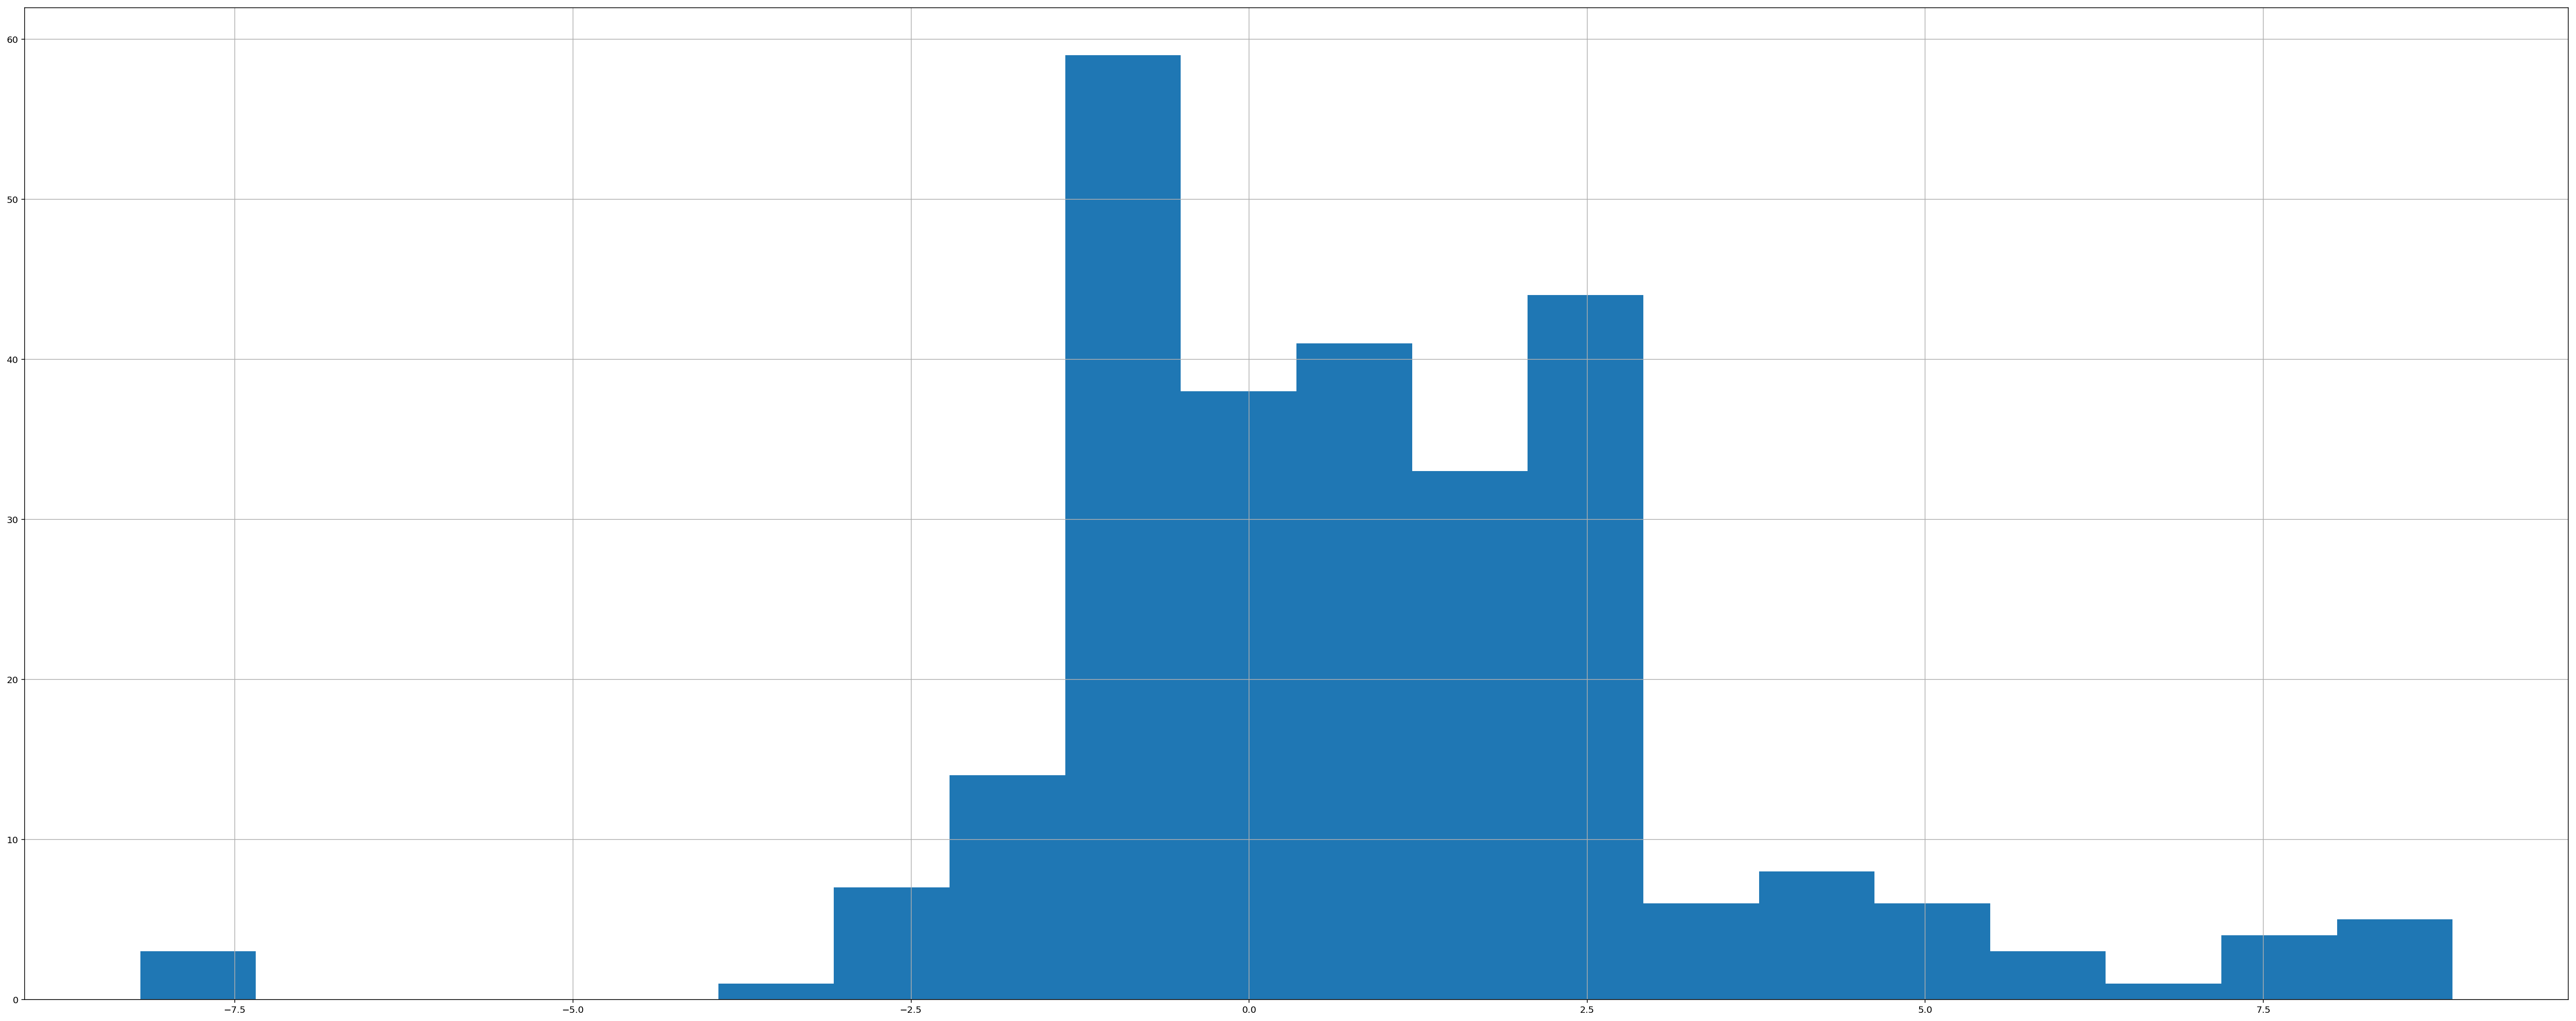

In [117]:
exp_id = '5ce07bcfd71f1037c0e267c3'
point_no = 101

p = mongo.Experiment.objects(pk=exp_id).first().points[point_no].fetch()

from pprint import pprint

p.evaluation_on_test.deals_per_day
p.evaluation_on_test.mean
p.evaluation_on_test.days

df_deals = pd.DataFrame(p.evaluation_on_test.all_deals)

(df_deals.profit > 0).sum(), df_deals.shape[0]

df_deals.profit.hist(bins=20, figsize=(50, 20))